In [ ]:
# # Reqirements:
# ultralytics==8.0.58
# numpy==1.24.2
# pandas
# matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !wget https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/file_downloaded

In [ ]:
!unzip '/content/gdrive/MyDrive/CV Course/DATA/YOLO_IMG_CLASSIFIER/Weather_yolo_img_clsf_data.zip'  #full data in drive, above URL us partial data.so upto you which data you want to use.

Streaming output truncated to the last 5000 lines.
  inflating: data/sunny/s029.jpg     
  inflating: data/sunny/s0290.jpg    
  inflating: data/sunny/s0291.jpg    
  inflating: data/sunny/s0292.jpg    
  inflating: data/sunny/s0293.jpg    
  inflating: data/sunny/s0294.jpg    
  inflating: data/sunny/s0295.jpg    
  inflating: data/sunny/s0296.jpg    
  inflating: data/sunny/s0297.jpg    
  inflating: data/sunny/s0298.jpg    
  inflating: data/sunny/s0299.jpg    
  inflating: data/sunny/s030.jpg     
  inflating: data/sunny/s0300.jpg    
  inflating: data/sunny/s0301.jpg    
  inflating: data/sunny/s0302.jpg    
  inflating: data/sunny/s0303.jpg    
  inflating: data/sunny/s0304.jpg    
  inflating: data/sunny/s0305.jpg    
  inflating: data/sunny/s0306.jpg    
  inflating: data/sunny/s0307.jpg    
  inflating: data/sunny/s0308.jpg    
  inflating: data/sunny/s0309.jpg    
  inflating: data/sunny/s031.jpg     
  inflating: data/sunny/s0310.jpg    
  inflating: data/sunny/s0311.jpg    

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil


def organize_dataset(root_folder,target_folder, train_ratio=0.5, test_ratio=0.2,valid_ratio=0.3):
  data={'filename':[],'category_name':[]}
  #iterate through root folder
  for category_name in os.listdir(root_folder):
    print('category_name : ',category_name)
    category_folder = os.path.join(root_folder,category_name)
    print('category_folder : ',category_folder)

    os.chdir(category_folder)
    print(os.getcwd())

    for filename in os.listdir(category_folder):
      if filename.endswith(('.jpg','.jpeg','.png')):
        data['filename'].append(filename)
        data['category_name'].append(category_name)

  df=pd.DataFrame(data)
  print(df.head())
  print(df.tail())
  print(df['category_name'].value_counts())

  train_df , test_df=train_test_split(df, test_size=test_ratio, random_state=23)
  train_df , valid_df=train_test_split(train_df, test_size=(valid_ratio /(train_ratio+valid_ratio)), random_state=23)


  train_df['split_type'] = 'train'
  valid_df['split_type'] = 'val'
  test_df['split_type'] = 'test'

  # Print the number of files in each split
  print(f"Train: {len(train_df)} files")
  print(f"Train: {(train_df['category_name'].value_counts())} files")

  print(f"Valid: {len(valid_df)} files")
  print(f"Train: {(valid_df['category_name'].value_counts())} files")

  print(f"Test: {len(test_df)} files")
  print(f"Train: {(test_df['category_name'].value_counts())} files")

  # Move files to the appropriate folders
  for idx, row in train_df.iterrows():
      dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
      os.makedirs(dest_folder, exist_ok=True)
      shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

  for idx, row in valid_df.iterrows():
      dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
      os.makedirs(dest_folder, exist_ok=True)
      shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

  for idx, row in test_df.iterrows():
      dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
      os.makedirs(dest_folder, exist_ok=True)
      shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

root_folder='/content/data'
target_folder='/content/data_str'

organize_dataset(root_folder,target_folder)

os.chdir('/content/')
print(os.getcwd())

category_name :  foggy
category_folder :  /content/data/foggy
/content/data/foggy
category_name :  cloudy
category_folder :  /content/data/cloudy
/content/data/cloudy
category_name :  snowy
category_folder :  /content/data/snowy
/content/data/snowy
category_name :  sunny
category_folder :  /content/data/sunny
/content/data/sunny
category_name :  rainy
category_folder :  /content/data/rainy
/content/data/rainy
         filename category_name
0        4249.jpg         foggy
1  3556558494.jpg         foggy
2      600879.jpg         foggy
3  2302304381.jpg         foggy
4  2307355439.jpg         foggy
             filename category_name
18033     rain180.jpg         rainy
18034  2288463408.jpg         rainy
18035  2222673691.jpg         rainy
18036          25.jpg         rainy
18037        1053.jpg         rainy
cloudy    6702
sunny     6274
rainy     1927
snowy     1875
foggy     1260
Name: category_name, dtype: int64
Train: 9018 files
Train: cloudy    3349
sunny     3147
snowy      961


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.2/710.2 kB 13.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
results = model.train(data='/content/data_str', epochs=100, imgsz=64)  # train the model


100%|██████████| 5.30M/5.30M [00:00<00:00, 231MB/s]


Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data_str, epochs=100, time=None, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 6.23M/6.23M [00:00<00:00, 34.0MB/s]


AMP: checks passed ✅


train: Scanning /content/data_str/train... 9016 images, 2 corrupt: 100%|██████████| 9018/9018 [00:03<00:00, 2633.39it/s]

train: WARNING ⚠️ /content/data_str/train/foggy/4160.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4261.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4269.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4514.jpg: ignoring corrupt image/label: invalid image format GIF
train: WARNING ⚠️ /content/data_str/train/foggy/4588.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4632.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4678.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4770.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4833.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4836.jpg: corrupt JPEG restor

train: New cache created: /content/data_str/train.cache


val: Scanning /content/data_str/val... 5411 images, 1 corrupt: 100%|██████████| 5412/5412 [00:02<00:00, 1862.72it/s]


val: WARNING ⚠️ /content/data_str/val/foggy/4186.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/foggy/4495.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/foggy/4868.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/rainy/1691.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/0981.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1187.jpg: ignoring corrupt image/label: invalid image format GIF
val: WARNING ⚠️ /content/data_str/val/snowy/1269.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1375.jpg: corrupt JPEG restored and saved
val: New cache created: /content/data_str/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 wei

      1/100     0.386G      1.684         16         64:   4%|▎         | 21/564 [00:02<00:44, 12.33it/s]

      1/100     0.386G      1.599         16         64:   9%|▉         | 53/564 [00:04<00:38, 13.32it/s]
100%|██████████| 755k/755k [00:00<00:00, 68.2MB/s]
      1/100     0.386G      1.228          8         64: 100%|██████████| 564/564 [00:46<00:00, 12.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.50it/s]

                   all      0.623          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.365G       1.09          8         64: 100%|██████████| 564/564 [00:45<00:00, 12.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.91it/s]

                   all      0.637          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.365G      1.146          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.49it/s]

                   all      0.661          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.365G      1.147          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.89it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.367G       0.96          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.88it/s]


                   all      0.697          1

      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.365G     0.8598          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.98it/s]

                   all      0.757          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.365G     0.8188          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.04it/s]

                   all      0.748          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.365G     0.7927          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.77it/s]

                   all      0.774          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.365G     0.7518          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.80it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.365G     0.7567          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.83it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.365G     0.7308          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.92it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.365G     0.7294          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.67it/s]


                   all      0.792          1

      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.365G     0.7237          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.78it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.365G     0.7078          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.85it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.365G     0.6843          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.01it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.365G     0.6784          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.07it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.365G     0.6648          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.94it/s]

                   all      0.785          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.365G      0.663          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.796          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.365G     0.6707          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.08it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.365G     0.6528          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.08it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.365G     0.6358          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.92it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.365G     0.6384          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.94it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.365G     0.6448          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.02it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.365G     0.6326          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.96it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.365G     0.6225          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.07it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.365G     0.6103          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.365G     0.6083          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.18it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.365G     0.6137          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.74it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.365G     0.6124          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.07it/s]

                   all      0.811          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.365G     0.6038          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.25it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.365G     0.5977          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.26it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.365G     0.5926          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.365G     0.5913          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.32it/s]


                   all      0.821          1

      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.367G     0.5833          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.12it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.367G     0.5752          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.365G      0.589          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.365G     0.5695          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.18it/s]


                   all      0.823          1

      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.365G     0.5698          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.11it/s]


                   all      0.818          1

      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.365G     0.5758          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.14it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.365G     0.5669          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.00it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.365G     0.5658          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.367G     0.5324          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.18it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.365G     0.5447          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.53it/s]


                   all      0.827          1

      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.365G     0.5414          8         64: 100%|██████████| 564/564 [00:40<00:00, 14.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.17it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.365G     0.5353          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.15it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.365G     0.5336          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.36it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.365G      0.537          8         64: 100%|██████████| 564/564 [00:39<00:00, 14.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.06it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.365G     0.5158          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.15it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.365G     0.5178          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.26it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.365G     0.5144          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]


                   all      0.831          1

      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.365G     0.5063          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.13it/s]


                   all      0.832          1

      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.365G     0.5134          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.365G     0.5169          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.31it/s]


                   all      0.828          1

      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.365G     0.4968          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.22it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.365G     0.4991          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.26it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.365G     0.4944          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.85it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.365G     0.4863          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.40it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.365G     0.4796          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.365G      0.479          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.38it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.365G     0.4703          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.22it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.365G     0.4741          8         64: 100%|██████████| 564/564 [00:39<00:00, 14.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.365G     0.4671          8         64: 100%|██████████| 564/564 [00:40<00:00, 14.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.00it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.365G     0.4696          8         64: 100%|██████████| 564/564 [00:39<00:00, 14.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.52it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.365G      0.463          8         64: 100%|██████████| 564/564 [00:40<00:00, 14.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.41it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.365G     0.4735          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.30it/s]


                   all      0.836          1

      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.365G     0.4657          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.28it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.365G     0.4646          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.18it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.365G     0.4402          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.04it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.365G     0.4557          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.35it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.365G     0.4353          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.365G     0.4364          8         64: 100%|██████████| 564/564 [00:39<00:00, 14.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.11it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.365G     0.4264          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.07it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.365G     0.4311          8         64: 100%|██████████| 564/564 [00:39<00:00, 14.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.26it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.367G     0.4105          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.32it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.365G     0.4117          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.35it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.365G     0.4152          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.19it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.365G     0.4174          8         64: 100%|██████████| 564/564 [00:40<00:00, 14.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.19it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.365G     0.4026          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.25it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.365G      0.406          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.20it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.365G     0.3963          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.20it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.365G     0.3889          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.31it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.367G     0.3833          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.10it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.365G     0.3771          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.28it/s]


                   all      0.834          1

      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.365G      0.374          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.94it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.365G     0.3698          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.14it/s]


                   all      0.833          1

      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.365G     0.3714          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.17it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.365G     0.3713          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.06it/s]


                   all      0.834          1

      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.365G     0.3579          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.15it/s]


                   all      0.836          1

      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.365G     0.3447          8         64: 100%|██████████| 564/564 [00:40<00:00, 13.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.88it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.365G     0.3437          8         64: 100%|██████████| 564/564 [00:40<00:00, 14.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.367G     0.3455          8         64: 100%|██████████| 564/564 [00:43<00:00, 13.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.96it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.365G     0.3266          8         64: 100%|██████████| 564/564 [00:43<00:00, 12.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.97it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.365G     0.3315          8         64: 100%|██████████| 564/564 [00:41<00:00, 13.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.08it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.365G     0.3366          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.00it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.365G     0.3222          8         64: 100%|██████████| 564/564 [00:43<00:00, 13.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.75it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.365G     0.3125          8         64: 100%|██████████| 564/564 [00:44<00:00, 12.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.89it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.365G     0.3197          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 12.09it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.365G     0.3147          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.15it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.365G      0.318          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.16it/s]


                   all      0.833          1

      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.365G     0.3033          8         64: 100%|██████████| 564/564 [00:42<00:00, 13.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:14<00:00, 11.99it/s]

                   all      0.833          1



100 epochs completed in 1.556 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.12 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/data_str/train... found 9018 images in 5 classes ✅ 
val: /content/data_str/val... found 5412 images in 5 classes ✅ 
test: /content/data_str/test... found 3608 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 170/170 [00:13<00:00, 12.23it/s]


                   all       0.84          1
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
!scp -r /content/runs '/content/gdrive/MyDrive/CV Course/code files/ImageClassificationYOLOv8'

# Plot Matrix

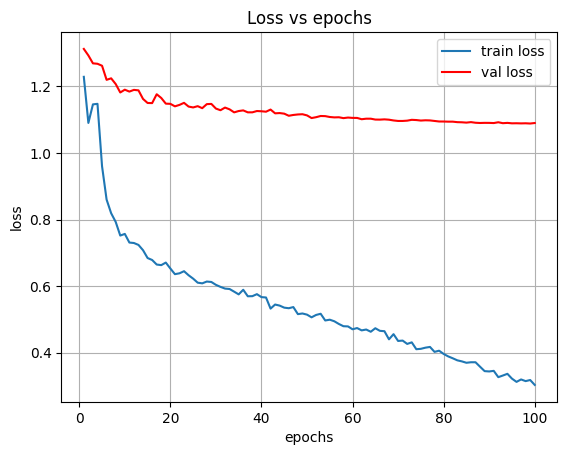

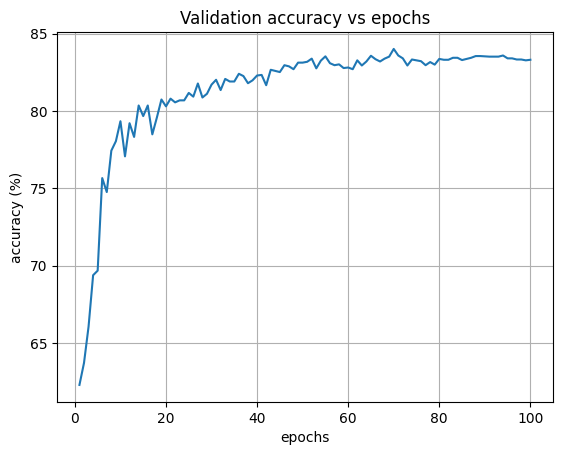

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# Test

In [ ]:
from google.colab.patches import cv2_imshow


image 1/1 /content/data/snowy/0839.jpg: 64x64 snowy 0.89, cloudy 0.05, rainy 0.05, sunny 0.01, foggy 0.00, 4.8ms
Speed: 9.1ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'snowy', 4: 'sunny'}
[0.054984141141176224, 0.003298361087217927, 0.045652277767658234, 0.8864243030548096, 0.009640859439969063]
snowy


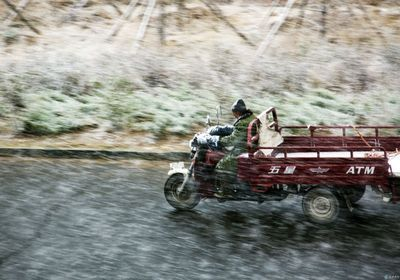

In [ ]:
model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

results = model('/content/data/snowy/0839.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])
from IPython.display import Image
Image('/content/data/snowy/0839.jpg')


image 1/1 /content/data_str/test/rainy/1144.jpg: 64x64 rainy 0.87, sunny 0.08, cloudy 0.04, foggy 0.00, snowy 0.00, 24.0ms
Speed: 6.1ms preprocess, 24.0ms inference, 0.2ms postprocess per image at shape (1, 3, 64, 64)
{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'snowy', 4: 'sunny'}
[0.04083548113703728, 0.004878714215010405, 0.8679616451263428, 0.001623822725377977, 0.0847003310918808]
rainy


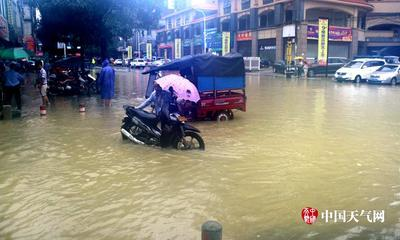

In [ ]:
results = model('/content/data_str/test/rainy/1144.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])
from IPython.display import Image
Image('/content/data_str/test/rainy/1144.jpg')


image 1/1 /content/data_str/test/foggy/171.jpg: 64x64 foggy 1.00, rainy 0.00, cloudy 0.00, snowy 0.00, sunny 0.00, 5.4ms
Speed: 5.6ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
{0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'snowy', 4: 'sunny'}
[3.981585905421525e-06, 0.99998939037323, 5.035313279222464e-06, 1.597600316927128e-06, 1.3372147833479175e-08]
foggy


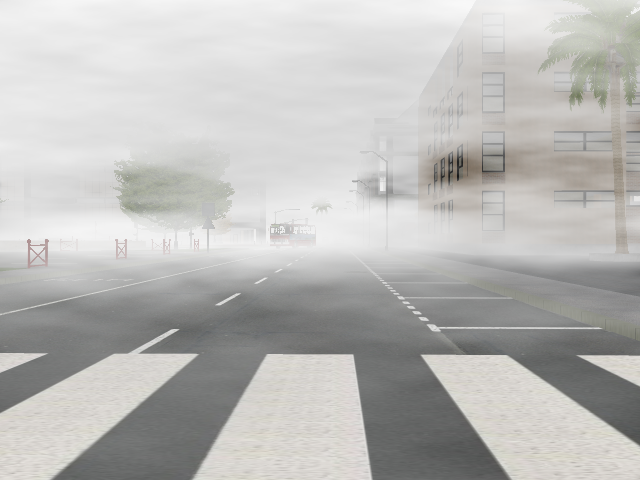

In [ ]:



results = model('/content/data_str/test/foggy/171.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])
from IPython.display import Image
Image('/content/data_str/test/foggy/171.jpg')